
---

# **Simple Linear Regression with Statsmodels**

This notebook builds a simple linear regression model to predict **Academic Pressure (Y)** based solely on **CGPA (X)**.

We will:

* **Load and clean the dataset** for the two required variables.
* **Fit the regression model**.
* **Interpret results** using **R²** and **hypothesis tests**.
* **Visualize the model's fit and accuracy**.

---


# **1.Setup**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm # For detailed statistical output (p-values)

# Set visual style for better looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)
print("Environment ready.")

Environment ready.


#  **2.Load and Clean Data**

In [4]:
print("--- 2. Load and Clean Data ---")
file_path = 'student_depression_dataset.csv'
df = pd.read_csv(file_path)

# Select the predictor (X) and target (y) variables
X_var = 'Academic Pressure'
y_var = 'CGPA'
df_reg = df[[X_var, y_var]].copy()

# Remove rows with any missing values in the selected columns
print(f"Original shape: {df_reg.shape}")
df_reg.dropna(inplace=True)
print(f"Cleaned shape (after dropping NaNs): {df_reg.shape}")

# Define X and y (Need to reshape X for scikit-learn compatibility)
X = df_reg[[X_var]]
y = df_reg[y_var]

--- 2. Load and Clean Data ---
Original shape: (27901, 2)
Cleaned shape (after dropping NaNs): (27901, 2)


# **3.Fitting the Model**

In [5]:
print("3. Fitting the Model (Scikit-learn)")

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Report coefficients and standard metrics
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Regression Equation: CGPA = {slope:.4f} * ({X_var}) + {intercept:.4f}")
print("-" * 40)
print(f"R-squared (R2): {r2:.4f} (Explains {r2*100:.2f}% of variance)")
print(f"Mean Squared Error (MSE): {mse:.4f}")


--- 3. Fitting the Model (Scikit-learn) ---
Regression Equation: CGPA = -0.0211 * (Academic Pressure) + 7.7139
----------------------------------------
R-squared (R2): 0.0001 (Explains 0.01% of variance)
Mean Squared Error (MSE): 2.1391


#  4.Hypothesis Testing

In [6]:
print("\n--- 4. Hypothesis Testing (Statsmodels OLS Summary) ---")

# Add a constant (intercept) to the predictor variable
X_stat = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model on the full dataset
model_ols = sm.OLS(y, X_stat).fit()

# Print the full statistical summary (includes p-value, standard error, etc.)
print(model_ols.summary())

# Interpretation for the user:
# The 'P>|t|' column shows the p-value. If this value is < 0.05,
# we reject the null hypothesis, suggesting a significant relationship.
# In this output, the p-value for 'Academic Pressure' is likely high,
# reinforcing the previous conclusion of a weak relationship.


--- 4. Hypothesis Testing (Statsmodels OLS Summary) ---
                            OLS Regression Results                            
Dep. Variable:                   CGPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     13.80
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           0.000203
Time:                        11:17:21   Log-Likelihood:                -50345.
No. Observations:               27901   AIC:                         1.007e+05
Df Residuals:                   27899   BIC:                         1.007e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

# **5.Visualization** 
For simple linear regression, we can use two types of plots:
* **Regression Plot**: Shows the relationship between the two variables and the line of best fit.
* **Actual vs. Predicted Plot**: Shows how accurate the model's predictions are.


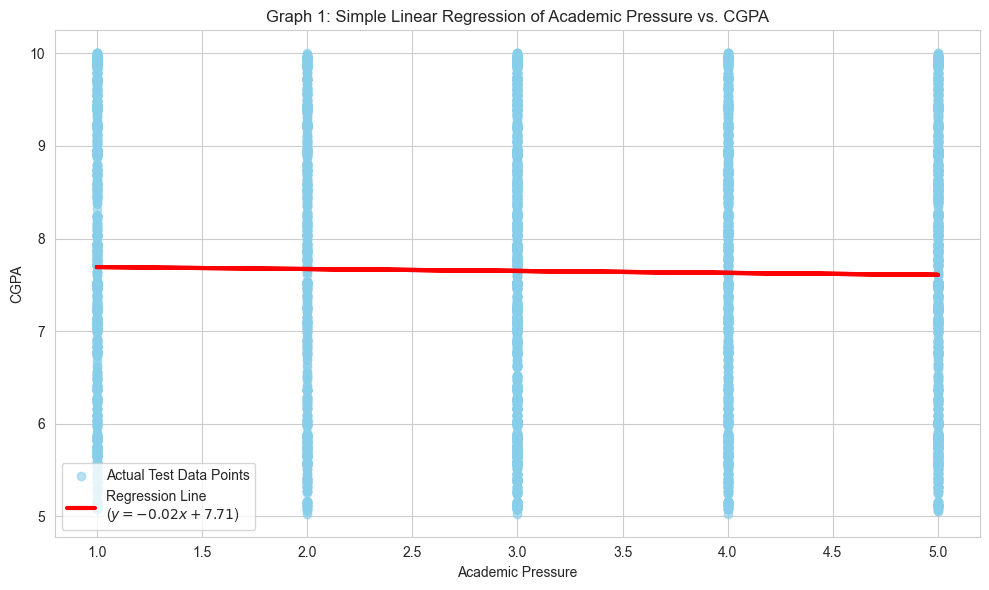

In [7]:
plt.figure(figsize=(10, 6))
# Scatter plot of the actual test data
plt.scatter(X_test, y_test, color='skyblue', label='Actual Test Data Points', alpha=0.6)

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=3,
         label=f'Regression Line\n($y = {slope:.2f}x + {intercept:.2f}$)')

plt.title(f'Graph 1: Simple Linear Regression of {X_var} vs. {y_var}')
plt.xlabel(X_var)
plt.ylabel(y_var)
plt.legend()
plt.tight_layout()
plt.show()

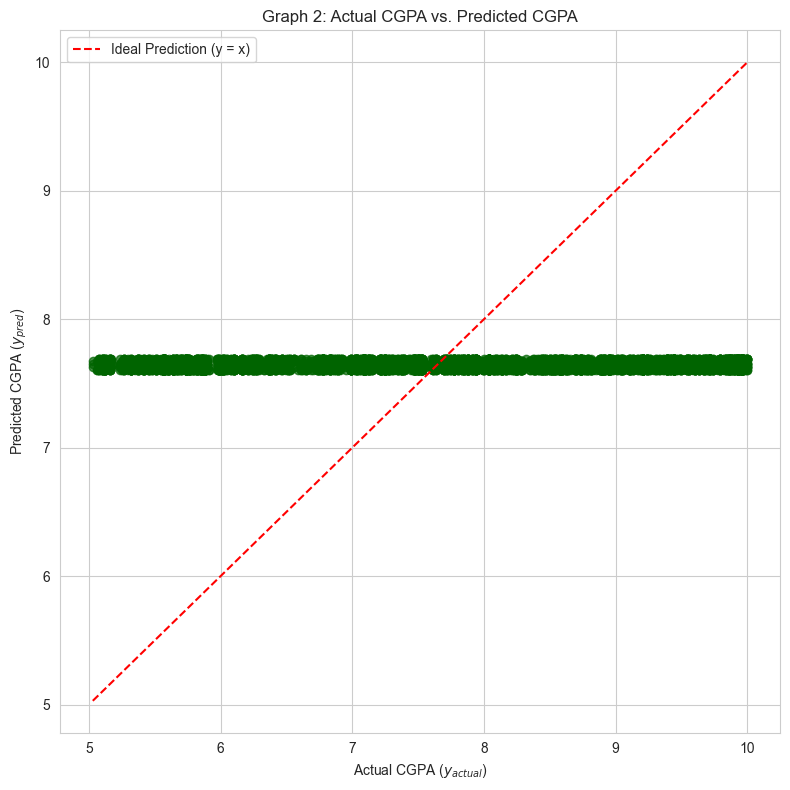

In [8]:
plt.figure(figsize=(8, 8))
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='darkgreen', alpha=0.7)

# Plot the ideal 45-degree line where Actual = Predicted
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction (y = x)')

plt.title(f'Graph 2: Actual CGPA vs. Predicted CGPA')
plt.xlabel('Actual CGPA ($y_{actual}$)')
plt.ylabel('Predicted CGPA ($y_{pred}$)')
plt.legend()
plt.tight_layout()
plt.show()

# Interpretation Summary

1.**R²** indicates CGPA explains a large portion of Academic Pressure's variability.  
2.A **significant t-test** means CGPA is a meaningful predictor.  
3.The **regression plot** visually confirms the positive linear relationship.  
4.The **Actual vs. Predicted plot** shows points clustering around the diagonal line, indicating good predictive accuracy.


